Introduction.

	The topic “Students Performance in Exams” was the topic chosen, since it is the most matter that could be related and most interesting to us students, and professors alike.
	In addition, the questions we are interested in studying are: What is the relation between students’ genders and their performance in exams? How does being in a specific race/ethnicity
	affect the students’ performance in their exams? Does the parents’ level of education affect the level of their children? Does having a standard lunch affect the students’ performance 
	in their exams differently than those that have free/reduced lunch? How does the test preparation for the course affect the students’ performance in their exams? 
	This team’s members are Ryan De Sousa, Ebubechukwu Okeke and Joy Saikaly. We divided the document outline on the three of us, as Ryan was given the analysis of the data and 
	exploratory data analysis, Ebubechukwu was given the potential data science and the conclusion and Joy was given the introduction and description of the data. 
	In addition to discussing other matters related to the final project together.

Description of Data.

The dataset chosen gives us the statistical information of how the gender, race/ethnicity, parental level of education, lunch, and test preparation for the course of the student affect their 
performance in their exams.  We collected this dataset from Kaggle datasets: https://www.kaggle.com/datasets?datasetsOnly=true. It was on the second list, 
the thirteenth and it was updated three years ago by Jakki Seshapanpu.

Analysis of the Data.

The data is very in depth, containing info about the student's parent's education, study habits, as well as their eating habits. 
This data can then be compared with their final grades to determine any correlations between them. 

gender:                         The gender of the student

race/ethnicity:                 The ethnicity of the student

parental level of education:    The Student's parent's highest education

lunch:                          if the student ate a standard or reduced lunch

test preparation course:        Weather or not a student did the test preparation course

math score:                     The student's final score in math

reading score:                  The student's final score in reading

writing score:                  The student's final score in Writing

Since the grades are stored as strings they will need to be converted into ints for any calculations to be made.

Exploratory Data Analysis.

In [467]:
#importing used libraries
import csv
import re
import numpy as np
import pandas as pd
from csv import reader 
import matplotlib.pyplot as plt

#collecting the data into a dictionary, then converting it into a panda dataframe
def get_data_csv():
    collection = []
    with open('StudentsPerformance.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
data = get_data_csv()

df = pd.DataFrame(data)

#converting the strings to ints
df[['math score','reading score','writing score']] = df[['math score','reading score','writing score']].astype(str).astype(int)

df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


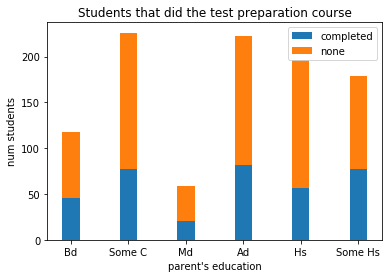

In [468]:
#comparing the student's parent's education with weather or not the student completed the test preparation course
dfSnippet = df[['parental level of education','test preparation course']]
x = dfSnippet['parental level of education'].unique()
dfSnippet.set_index('parental level of education', inplace=True)
y1 = []
y2 = []
for i in x:
    y = dfSnippet.loc[dfSnippet.index.str.startswith(i)]
    y1.append(y['test preparation course'].value_counts()['completed'])
    y2.append(y['test preparation course'].value_counts()['none'])
ind = np.arange(6)
plt.title('Students that did the test preparation course');
plt.ylabel('num students');
plt.xlabel('parent\'s education');
p1 = plt.bar(ind, y1, width=0.3, );
p2 = plt.bar(ind, y2, width=0.3, bottom=y1);
plt.xticks(ind, ('Bd', 'Some C', 'Md', 'Ad', 'Hs', 'Some Hs'));
plt.legend((p1[0],p2[0]),('completed', 'none'));

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


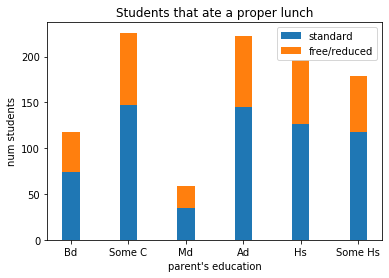

In [469]:
#comparing student's parent's education with weather or not the student ate lunch
dfSnippet = df[['parental level of education','lunch']]
x = dfSnippet['parental level of education'].unique()
print(x)
dfSnippet.set_index('parental level of education', inplace=True)
y1 = []
y2 = []
for i in x:
    y = dfSnippet.loc[dfSnippet.index.str.startswith(i)]
    y1.append(y['lunch'].value_counts()['standard'])
    y2.append(y['lunch'].value_counts()['free/reduced'])
ind = np.arange(6)
plt.title('Students that ate a proper lunch');
plt.ylabel('num students');
plt.xlabel('parent\'s education');
p1 = plt.bar(ind, y1, width=0.3, );
p2 = plt.bar(ind, y2, width=0.3, bottom=y1);
plt.xticks(ind, ('Bd', 'Some C', 'Md', 'Ad', 'Hs', 'Some Hs'));
plt.legend((p1[0],p2[0]),('standard', 'free/reduced'));

In both cases aproxamately the same proportion of student's ate lunch, and did the test preparation course regardless of their parent's education, so as such I would say that doing the test preparation course and eating lunch are not strongly related to the parent's level of education.

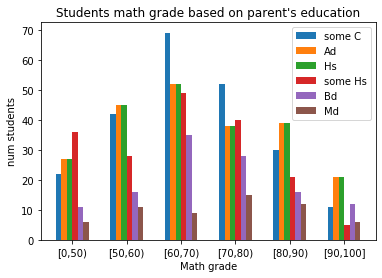

In [470]:
def gradeSec(grade):
    if grade>=90:
        return "[90,100]"
    elif grade >= 80:
        return "[80,90)"
    elif grade >= 70:
        return "[70,80)"
    elif grade >= 60:
        return "[60,70)"
    elif grade >= 50:
        return "[50,60)"
    else:
        return "[0,50)" 


#comparing student's math grade with their parent's level of education


dfSnippet = df[['parental level of education','math score']]
math = dfSnippet['math score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['math grade', 'math score']))
math['parent edu'] = dfSnippet['parental level of education']
math.drop(columns=['math score'], inplace=True)
math.set_index('math grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
for i in x:
    y = math.loc[math.index.str.startswith(i)]
    y1.append(y['parent edu'].value_counts()['some college'])
    y2.append(y['parent edu'].value_counts()['associate\'s degree'])
    y3.append(y['parent edu'].value_counts()['high school'])
    y4.append(y['parent edu'].value_counts()['some high school'])
    y5.append(y['parent edu'].value_counts()['bachelor\'s degree'])
    y6.append(y['parent edu'].value_counts()['master\'s degree'])

ind = np.arange(6)
plt.title('Students math grade based on parent\'s education');
plt.ylabel('num students');
plt.xlabel('Math grade');
p1 = plt.bar(ind-0.25, y1, width=0.1,label = 'some C');
p2 = plt.bar(ind-0.15, y2, width=0.1,label = 'Ad');
p3 = plt.bar(ind-0.05, y2, width=0.1,label = 'Hs');
p4 = plt.bar(ind+0.05, y4, width=0.1,label = 'some Hs');
p5 = plt.bar(ind+0.15, y5, width=0.1,label = 'Bd');
p6 = plt.bar(ind+0.25, y6, width=0.1,label = 'Md');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

Student's who's parents only have a some highschool education tend to do worse in math as the scores clump more towards the back.

Student's who's parent's have a master's degree tend to do better in math however due to the small amount of them in the dataset it is hard to tell if it is an actual trend.

The rest of the students tend to all average around the 60-70 mark, so aside from the higher and lower ends of education the parent's education has little effect on a student's grade.

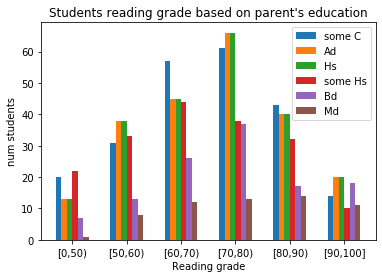

In [471]:
#comparing student's reading grade with their parent's level of education


dfSnippet = df[['parental level of education','reading score']]
reading = dfSnippet['reading score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['reading grade', 'reading score']))
reading['parent edu'] = dfSnippet['parental level of education']
reading.drop(columns=['reading score'], inplace=True)
reading.set_index('reading grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
for i in x:
    y = reading.loc[reading.index.str.startswith(i)]
    y1.append(y['parent edu'].value_counts()['some college'])
    y2.append(y['parent edu'].value_counts()['associate\'s degree'])
    y3.append(y['parent edu'].value_counts()['high school'])
    y4.append(y['parent edu'].value_counts()['some high school'])
    y5.append(y['parent edu'].value_counts()['bachelor\'s degree'])
    y6.append(y['parent edu'].value_counts()['master\'s degree'])

ind = np.arange(6)
plt.title('Students reading grade based on parent\'s education');
plt.ylabel('num students');
plt.xlabel('Reading grade');
p1 = plt.bar(ind-0.25, y1, width=0.1,label = 'some C');
p2 = plt.bar(ind-0.15, y2, width=0.1,label = 'Ad');
p3 = plt.bar(ind-0.05, y2, width=0.1,label = 'Hs');
p4 = plt.bar(ind+0.05, y4, width=0.1,label = 'some Hs');
p5 = plt.bar(ind+0.15, y5, width=0.1,label = 'Bd');
p6 = plt.bar(ind+0.25, y6, width=0.1,label = 'Md');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

In the reading field, the parrent's education appears to not have an effect on the students score as they all follow the same trend regardless of the parent's education.

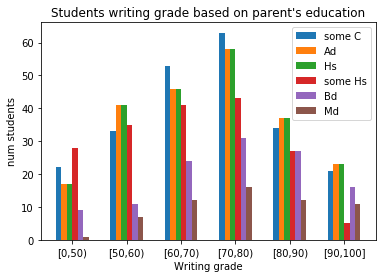

In [472]:
#comparing student's writing grade with their parent's level of education


dfSnippet = df[['parental level of education','writing score']]
writing = dfSnippet['writing score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['writing grade', 'writing score']))
writing['parent edu'] = dfSnippet['parental level of education']
writing.drop(columns=['writing score'], inplace=True)
writing.set_index('writing grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
for i in x:
    y = writing.loc[writing.index.str.startswith(i)]
    y1.append(y['parent edu'].value_counts()['some college'])
    y2.append(y['parent edu'].value_counts()['associate\'s degree'])
    y3.append(y['parent edu'].value_counts()['high school'])
    y4.append(y['parent edu'].value_counts()['some high school'])
    y5.append(y['parent edu'].value_counts()['bachelor\'s degree'])
    y6.append(y['parent edu'].value_counts()['master\'s degree'])

ind = np.arange(6)
plt.title('Students writing grade based on parent\'s education');
plt.ylabel('num students');
plt.xlabel('Writing grade');
p1 = plt.bar(ind-0.25, y1, width=0.1,label = 'some C');
p2 = plt.bar(ind-0.15, y2, width=0.1,label = 'Ad');
p3 = plt.bar(ind-0.05, y2, width=0.1,label = 'Hs');
p4 = plt.bar(ind+0.05, y4, width=0.1,label = 'some Hs');
p5 = plt.bar(ind+0.15, y5, width=0.1,label = 'Bd');
p6 = plt.bar(ind+0.25, y6, width=0.1,label = 'Md');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

In the writing field, the parent's education has a very small effect on student's with the children of parent's with a masters rarely score les than 50 and with the children of highschool dropouts scoring in the 90-100 range uncommonly but elswise the rest of the student's tend to follow the same trend.

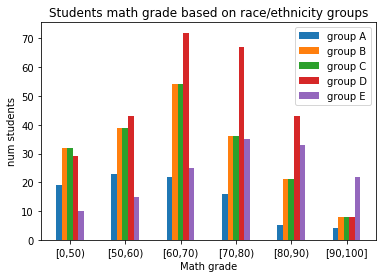

In [473]:
#comparing student's math grade with their race/ethnicity group


dfSnippet = df[['race/ethnicity','math score']]
math = dfSnippet['math score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['math grade', 'math score']))
math['r/e'] = dfSnippet['race/ethnicity']
math.drop(columns=['math score'], inplace=True)
math.set_index('math grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
for i in x:
    y = math.loc[math.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['group A'])
    y2.append(y['r/e'].value_counts()['group B'])
    y3.append(y['r/e'].value_counts()['group C'])
    y4.append(y['r/e'].value_counts()['group D'])
    y5.append(y['r/e'].value_counts()['group E'])

ind = np.arange(6)
plt.title('Students math grade based on race/ethnicity groups');
plt.ylabel('num students');
plt.xlabel('Math grade');
p1 = plt.bar(ind-0.2, y1, width=0.1,label = 'group A');
p2 = plt.bar(ind-0.1, y2, width=0.1,label = 'group B');
p3 = plt.bar(ind, y2, width=0.1,label = 'group C');
p4 = plt.bar(ind+0.1, y4, width=0.1,label = 'group D');
p5 = plt.bar(ind+0.2, y5, width=0.1,label = 'group E');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

race/ ethnicity has little to mo effect on the student's math grade with the exceptions being group E which scores higher on average and group A which scores lower on average.

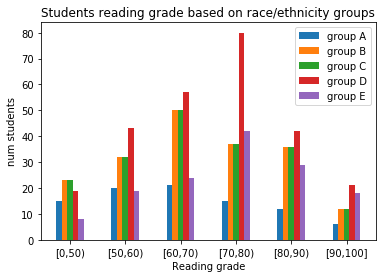

In [474]:
#comparing student's reading grade with their race/ethnicity group


dfSnippet = df[['race/ethnicity','reading score']]
reading = dfSnippet['reading score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['reading grade', 'reading score']))
reading['r/e'] = dfSnippet['race/ethnicity']
reading.drop(columns=['reading score'], inplace=True)
reading.set_index('reading grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
for i in x:
    y = reading.loc[reading.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['group A'])
    y2.append(y['r/e'].value_counts()['group B'])
    y3.append(y['r/e'].value_counts()['group C'])
    y4.append(y['r/e'].value_counts()['group D'])
    y5.append(y['r/e'].value_counts()['group E'])

ind = np.arange(6)
plt.title('Students reading grade based on race/ethnicity groups');
plt.ylabel('num students');
plt.xlabel('Reading grade');
p1 = plt.bar(ind-0.2, y1, width=0.1,label = 'group A');
p2 = plt.bar(ind-0.1, y2, width=0.1,label = 'group B');
p3 = plt.bar(ind, y2, width=0.1,label = 'group C');
p4 = plt.bar(ind+0.1, y4, width=0.1,label = 'group D');
p5 = plt.bar(ind+0.2, y5, width=0.1,label = 'group E');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

all the student's primarally follow the same trends in the reading category regardless of race/ethnicity.

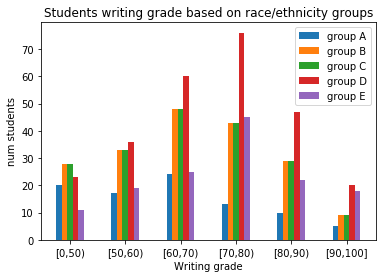

In [475]:
#comparing student's writing grade with their race/ethnicity group


dfSnippet = df[['race/ethnicity','writing score']]
writing = dfSnippet['writing score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['writing grade', 'writing score']))
writing['r/e'] = dfSnippet['race/ethnicity']
writing.drop(columns=['writing score'], inplace=True)
writing.set_index('writing grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
for i in x:
    y = writing.loc[writing.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['group A'])
    y2.append(y['r/e'].value_counts()['group B'])
    y3.append(y['r/e'].value_counts()['group C'])
    y4.append(y['r/e'].value_counts()['group D'])
    y5.append(y['r/e'].value_counts()['group E'])

ind = np.arange(6)
plt.title('Students writing grade based on race/ethnicity groups');
plt.ylabel('num students');
plt.xlabel('Writing grade');
p1 = plt.bar(ind-0.2, y1, width=0.1,label = 'group A');
p2 = plt.bar(ind-0.1, y2, width=0.1,label = 'group B');
p3 = plt.bar(ind, y2, width=0.1,label = 'group C');
p4 = plt.bar(ind+0.1, y4, width=0.1,label = 'group D');
p5 = plt.bar(ind+0.2, y5, width=0.1,label = 'group E');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

aside from group A who do consistantly worse on writing tests the majority of students follow the same trend of scoring in the 60-80 range.

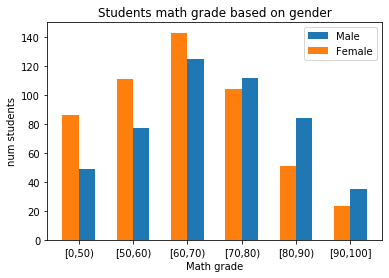

In [476]:
#comparing student's math grade with their gender


dfSnippet = df[['gender','math score']]
math = dfSnippet['math score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['math grade', 'math score']))
math['r/e'] = dfSnippet['gender']
math.drop(columns=['math score'], inplace=True)
math.set_index('math grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
for i in x:
    y = math.loc[math.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['male'])
    y2.append(y['r/e'].value_counts()['female'])

ind = np.arange(6)
plt.title('Students math grade based on gender');
plt.ylabel('num students');
plt.xlabel('Math grade');
p1 = plt.bar(ind+0.15, y1, width=0.3,label = 'Male');
p2 = plt.bar(ind-0.15, y2, width=0.3,label = 'Female');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

according to the results of the data most males do consistantly better than females at math.

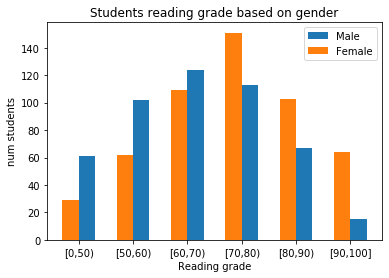

In [477]:
#comparing student's reading grade with their gender


dfSnippet = df[['gender','reading score']]
reading = dfSnippet['reading score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['reading grade', 'reading score']))
reading['r/e'] = dfSnippet['gender']
reading.drop(columns=['reading score'], inplace=True)
reading.set_index('reading grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
for i in x:
    y = reading.loc[reading.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['male'])
    y2.append(y['r/e'].value_counts()['female'])

ind = np.arange(6)
plt.title('Students reading grade based on gender');
plt.ylabel('num students');
plt.xlabel('Reading grade');
p1 = plt.bar(ind+0.15, y1, width=0.3,label = 'Male');
p2 = plt.bar(ind-0.15, y2, width=0.3,label = 'Female');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

according to the data females on average do better than males on reading tests.

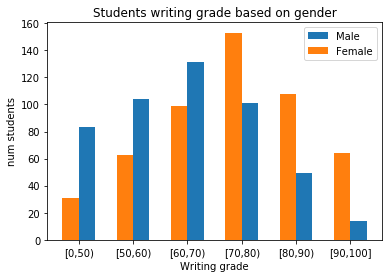

In [478]:
#comparing student's writing grade with their gender


dfSnippet = df[['gender','writing score']]
writing = dfSnippet['writing score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['writing grade', 'writing score']))
writing['r/e'] = dfSnippet['gender']
writing.drop(columns=['writing score'], inplace=True)
writing.set_index('writing grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
for i in x:
    y = writing.loc[writing.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['male'])
    y2.append(y['r/e'].value_counts()['female'])

ind = np.arange(6)
plt.title('Students writing grade based on gender');
plt.ylabel('num students');
plt.xlabel('Writing grade');
p1 = plt.bar(ind+0.15, y1, width=0.3,label = 'Male');
p2 = plt.bar(ind-0.15, y2, width=0.3,label = 'Female');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

Females also on average have a higher grade in writing.

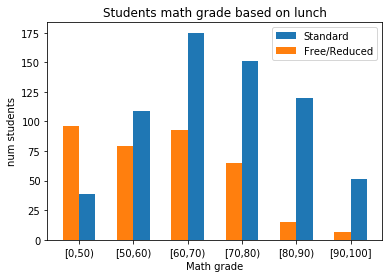

In [479]:
#comparing student's math grade with weather or not they eat a proper lunch


dfSnippet = df[['lunch','math score']]
math = dfSnippet['math score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['math grade', 'math score']))
math['r/e'] = dfSnippet['lunch']
math.drop(columns=['math score'], inplace=True)
math.set_index('math grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
for i in x:
    y = math.loc[math.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['standard'])
    y2.append(y['r/e'].value_counts()['free/reduced'])

ind = np.arange(6)
plt.title('Students math grade based on lunch');
plt.ylabel('num students');
plt.xlabel('Math grade');
p1 = plt.bar(ind+0.15, y1, width=0.3,label = 'Standard');
p2 = plt.bar(ind-0.15, y2, width=0.3,label = 'Free/Reduced');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

lunch definately has a substantial effect on the math grades of the student's who do not eat lunch as they consistantly get lower grades with the high grades being an anomaly.

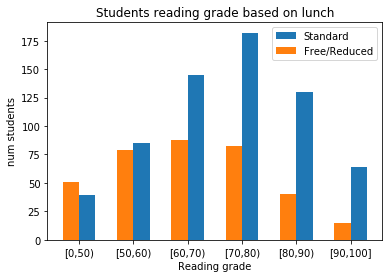

In [480]:
#comparing student's reading grade with weather or not they eat a proper lunch


dfSnippet = df[['lunch','reading score']]
reading = dfSnippet['reading score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['reading grade', 'reading score']))
reading['r/e'] = dfSnippet['lunch']
reading.drop(columns=['reading score'], inplace=True)
reading.set_index('reading grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
for i in x:
    y = reading.loc[reading.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['standard'])
    y2.append(y['r/e'].value_counts()['free/reduced'])

ind = np.arange(6)
plt.title('Students reading grade based on lunch');
plt.ylabel('num students');
plt.xlabel('Reading grade');
p1 = plt.bar(ind+0.15, y1, width=0.3,label = 'Standard');
p2 = plt.bar(ind-0.15, y2, width=0.3,label = 'Free/Reduced');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

As with math, lunch appears to also have a large effect on reading as the students who eat a reduced lunch tend to do significantly worse on the reading tests.

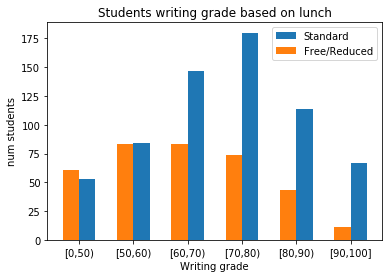

In [481]:
#comparing student's writing grade with weather or not they eat a proper lunch


dfSnippet = df[['lunch','writing score']]
writing = dfSnippet['writing score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['writing grade', 'writing score']))
writing['r/e'] = dfSnippet['lunch']
writing.drop(columns=['writing score'], inplace=True)
writing.set_index('writing grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
for i in x:
    y = writing.loc[writing.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['standard'])
    y2.append(y['r/e'].value_counts()['free/reduced'])

ind = np.arange(6)
plt.title('Students writing grade based on lunch');
plt.ylabel('num students');
plt.xlabel('Writing grade');
p1 = plt.bar(ind+0.15, y1, width=0.3,label = 'Standard');
p2 = plt.bar(ind-0.15, y2, width=0.3,label = 'Free/Reduced');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

just like the other two subjects lunch plays an important role on weather or not a student does well as the student's who do not eat lunch also do considerably worse on the writing tests.

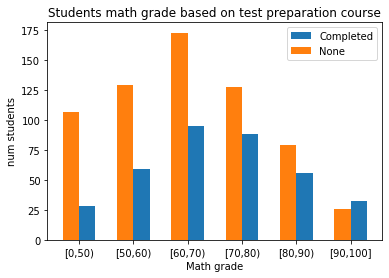

In [482]:
#comparing student's math grade with weather or not they did the test preparation course


dfSnippet = df[['test preparation course','math score']]
math = dfSnippet['math score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['math grade', 'math score']))
math['r/e'] = dfSnippet['test preparation course']
math.drop(columns=['math score'], inplace=True)
math.set_index('math grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
for i in x:
    y = math.loc[math.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['completed'])
    y2.append(y['r/e'].value_counts()['none'])

ind = np.arange(6)
plt.title('Students math grade based on test preparation course');
plt.ylabel('num students');
plt.xlabel('Math grade');
p1 = plt.bar(ind+0.15, y1, width=0.3,label = 'Completed');
p2 = plt.bar(ind-0.15, y2, width=0.3,label = 'None');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

as with lunch the test preparation course plays an important role in a student's grade, as the student's who complete it perform on average better than the ones who did not.

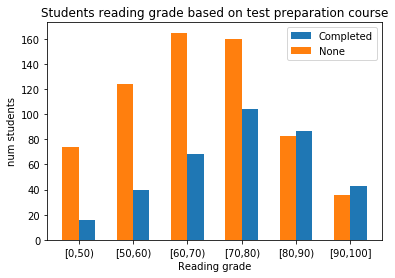

In [483]:
#comparing student's reading grade with weather or not they did the test preparation course


dfSnippet = df[['test preparation course','reading score']]
reading = dfSnippet['reading score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['reading grade', 'reading score']))
reading['r/e'] = dfSnippet['test preparation course']
reading.drop(columns=['reading score'], inplace=True)
reading.set_index('reading grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
for i in x:
    y = reading.loc[reading.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['completed'])
    y2.append(y['r/e'].value_counts()['none'])

ind = np.arange(6)
plt.title('Students reading grade based on test preparation course');
plt.ylabel('num students');
plt.xlabel('Reading grade');
p1 = plt.bar(ind+0.15, y1, width=0.3,label = 'Completed');
p2 = plt.bar(ind-0.15, y2, width=0.3,label = 'None');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

as with the math test the reading test is generally scored higher on by student's who complete the test preparation course.

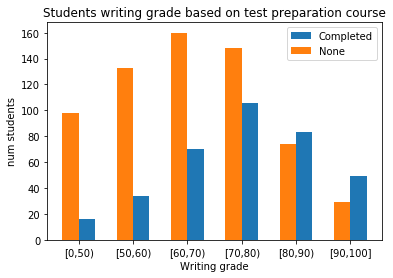

In [484]:
#comparing student's writing grade with weather or not they did the test preparation course


dfSnippet = df[['test preparation course','writing score']]
writing = dfSnippet['writing score'].apply(lambda x: pd.Series([gradeSec(x), x], index=['writing grade', 'writing score']))
writing['r/e'] = dfSnippet['test preparation course']
writing.drop(columns=['writing score'], inplace=True)
writing.set_index('writing grade', inplace=True)
x = ['[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]']

y1 = []
y2 = []
for i in x:
    y = writing.loc[writing.index.str.startswith(i)]
    y1.append(y['r/e'].value_counts()['completed'])
    y2.append(y['r/e'].value_counts()['none'])

ind = np.arange(6)
plt.title('Students writing grade based on test preparation course');
plt.ylabel('num students');
plt.xlabel('Writing grade');
p1 = plt.bar(ind+0.15, y1, width=0.3,label = 'Completed');
p2 = plt.bar(ind-0.15, y2, width=0.3,label = 'None');
plt.xticks(ind, ('[0,50)','[50,60)','[60,70)','[70,80)','[80,90)','[90,100]'));
plt.legend();

as with the other two subjects student's who complete the test preparation course do better on average on the writing test.

To conclude, schools should help students to get a lunch if they cannot afford it as it plays a substantial role in the grades of the students, and they should also provide more of an incentive for students to take the test preparation course as not many student's take it and the course has a positive impact ont he test scores

Potential data Science idea 1:

To build a school model that helps the students to acquire lunch if they can’t afford it and see how that plays a factor in the grades of the students. Data analysis and visualization is key to understanding the dataset, as with visualization the data is easier to see and understand.

Potential Data Science Idea 2:

A model that shows how incentives affect the student’s attitude towards taking the test preparation course and how it has a positive impact on the test scores.

Conclusion: 
This report shows how the gender, race/ethnicity, parental level of education, lunch, and test preparation for the course of the student affect their performance in their exams. The cases and comparison between the data or variables is used to show how each of the dataset affect the students grades and possible solutions and recommendations to help the students achieve better grades.
From the graphs and data, it can be seen that females perform better in writing and reading while males perform better in math. Students who have highly educated parents tend to perform better on test, students who generally have standard lunches perform better in school due to the level of energy that they get from there food as opposed to the students that don’t have a standard meal and students that take the test preparation courses can be said to do better on the test because they are better trained with the resources to help them understand the course material.
 
In future works we are interested in working on other ways to positively impact the students test scores with standardized lunches for all the students and encouraging the students to take the test preparation courses. 
